In [109]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [132]:
# load dataset with band gaps, info from OMDB, num_atoms, coulomb matrix, padded coulomb matrix, eigenvalues
df = pd.read_csv('fulldf.csv',encoding = 'unicode_escape') 

In [142]:
bg_avg = np.mean(df['bandgaps']) # band gap mean
bgs = df['bandgaps'].subtract(bg_avg) # shifting band gaps for 0 mean 
df['bandgaps'] = bgs

In [143]:
# converting eigenvectors from strings to lists of floats 
sorted_eigs = df['eig']
conv_eigs = []
for val in sorted_eigs:
    temp = []
    eig_str = val[1:-1] # get rid of brackets
    try:
        temp = [float(x) for x in eig_str.split(',')]
    except:
        t = [complex(''.join(a.split())) for a in eig_str.split(',')]  
        temp = [z.real for z in t]
    conv_eigs.append(temp)

In [144]:
# Linear Regression using eigenvectors from padded Coulomb matrices
X_train, X_test, y_train, y_test = train_test_split(conv_eigs, bgs, test_size=0.30)#, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [145]:
print('Using eigenvectors from padded Coulomb matrices')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Using eigenvectors from padded Coulomb matrices
Mean Absolute Error: 0.8031511104049848
Mean Squared Error: 3.828089871179646
Root Mean Squared Error: 1.956550503099689


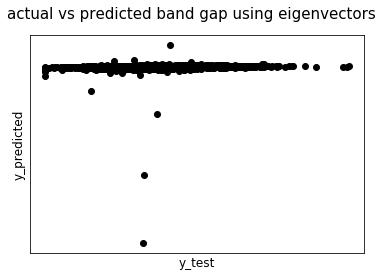

In [141]:
# Plot outputs
plt.scatter(y_test, y_pred,  color='black')
#plt.plot(y_test, y_pred, color='blue', linewidth=3)
plt.suptitle('actual vs predicted band gap using eigenvectors', fontsize=15)

plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_predicted', fontsize=12)
plt.xticks(())
plt.yticks(())

plt.show()

In [146]:
df2 = df[['_chemical_formula_weight','_space_group_IT_number', '_symmetry_cell_setting', '_symmetry_space_group_name_H-M',
         '_cell_angle_alpha', '_cell_angle_beta', '_cell_angle_gamma', '_diffrn_reflns_theta_full',
         '_diffrn_reflns_theta_max', '_diffrn_reflns_theta_min', '_exptl_absorpt_coefficient_mu',
         '_exptl_absorpt_correction_T_max', '_exptl_absorpt_correction_T_min', 'num_atoms']]

In [147]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
space_vals_temp = df2['_symmetry_space_group_name_H-M']
df2['_symmetry_space_group_name_H-M'] = space_vals_temp.astype(str)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df2['_symmetry_space_group_name_H-M'])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
space_vals_encoded = onehot_encoder.fit_transform(integer_encoded)

/Users/michellevoong/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/michellevoong/anaconda2/envs/py37/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  war

In [148]:
df2['_symmetry_space_group_name_H-M'] = integer_encoded

/Users/michellevoong/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
df2.head()

,_chemical_formula_weight,_space_group_IT_number,_symmetry_cell_setting,_symmetry_space_group_name_H-M,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,_diffrn_reflns_theta_full,_diffrn_reflns_theta_max,_diffrn_reflns_theta_min,_exptl_absorpt_coefficient_mu,_exptl_absorpt_correction_T_max,_exptl_absorpt_correction_T_min,num_atoms
0,454.29,2.0,3.0,30,100.182,93.405,110.024,-100.000,27.940,3.940,0.852,0.7849,0.7015,104
1,329.97,2.0,-100.1,30,84.549,86.322,78.859,25.214,26.015,2.618,0.770,0.9650,0.9200,52
2,339.34,2.0,3.0,30,82.166,78.000,82.390,27.450,27.450,1.830,0.108,0.9957,0.9633,84
3,241.11,9.0,1.0,4,90.000,100.024,90.000,25.000,25.000,4.500,0.568,1.0000,0.7330,100
4,203.24,14.0,1.0,48,90.000,110.890,90.000,-100.100,25.000,2.000,0.090,-100.1000,-100.1000,112


In [150]:
# Linear Regression 
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(df2, bgs, test_size=0.30)#, random_state=42)
reg = LinearRegression().fit(X_train_o, y_train_o)
y_pred_omdb = reg.predict(X_test_o)
#y_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
y_df_omdb = pd.DataFrame({'Actual': y_test_o, 'Predicted': y_pred_omdb})

In [151]:
print('Using OMDB features')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_o, y_pred_omdb))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_o, y_pred_omdb))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_o, y_pred_omdb)))

Using OMDB features
Mean Absolute Error: 0.7456384053463946
Mean Squared Error: 0.906179387744561
Root Mean Squared Error: 0.9519345501370149


In [152]:
from sklearn.metrics import r2_score
r2_score(y_test_o, y_pred_omdb, multioutput='variance_weighted')

0.12471489217747267

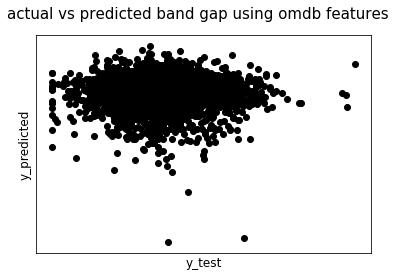

In [153]:
# Plot outputs
plt.scatter(y_test, y_pred_omdb,  color='black')
#plt.plot(y_test, y_pred, color='blue', linewidth=3)
plt.suptitle('actual vs predicted band gap using omdb features', fontsize=15)

plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_predicted', fontsize=12)

plt.xticks(())
plt.yticks(())

plt.show()

In [154]:
np.std(df['bandgaps'])

1.0309685292243016

In [156]:
df_sparse = df2
#[['_chemical_formula_weight','_space_group_IT_number', '_symmetry_cell_setting', 
 #                '_symmetry_space_group_name_H-M','num_atoms']]

In [157]:
df_sparse['bandgaps']=df['bandgaps']
train = df_sparse.drop(df_sparse[(df_sparse['num_atoms']<105)].index)
#train = df_sparse.drop(df_sparse[(df_sparse['num_atoms']>105)].index)
#set(df_sparse['num_atoms'])


/Users/michellevoong/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
train

,_chemical_formula_weight,_space_group_IT_number,_symmetry_cell_setting,_symmetry_space_group_name_H-M,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,_diffrn_reflns_theta_full,_diffrn_reflns_theta_max,_diffrn_reflns_theta_min,_exptl_absorpt_coefficient_mu,_exptl_absorpt_correction_T_max,_exptl_absorpt_correction_T_min,num_atoms,bandgaps
4,203.24,14.0,1.0,48,90.000,110.890,90.000,-100.100,25.000,2.000,0.090,-100.1000,-100.1000,112,0.102969
6,204.26,29.0,5.0,88,90.000,90.000,90.000,70.870,70.870,4.610,0.610,0.8675,0.8576,124,1.172969
11,206.23,14.0,1.0,48,90.000,100.429,90.000,68.260,68.260,7.240,0.797,0.8520,0.4910,116,-0.027031
17,580.51,-100.1,3.0,30,94.820,98.701,90.263,25.000,25.000,1.510,0.115,-100.1000,-100.1000,132,-0.937031
25,279.13,4.0,1.0,46,90.000,91.773,90.000,28.330,28.330,1.480,3.519,0.8721,0.4983,108,0.102969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,366.46,2.0,3.0,30,105.049,92.969,114.710,25.242,27.448,2.788,0.086,0.9750,0.9580,108,-1.327031
12482,220.25,14.0,1.0,48,90.000,102.962,90.000,33.020,33.020,4.140,0.570,0.9980,0.9150,106,-1.487031
12485,208.22,205.0,7.0,79,90.000,90.000,90.000,52.940,52.940,7.070,1.243,0.6570,0.6230,106,-1.307031
12490,459.77,14.0,1.0,50,90.000,92.079,90.000,25.300,25.300,2.100,12.939,0.3890,0.2840,130,0.852969


In [159]:
# Linear Regression 
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(train.drop(['bandgaps'], axis=1), train['bandgaps'], test_size=0.25, random_state=42)
reg = LinearRegression().fit(X_train_sp, y_train_sp)
y_pred_sp = reg.predict(X_test_sp)
#y_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
y_df_sparse = pd.DataFrame({'Actual': y_test_sp, 'Predicted': y_pred_sp})

In [160]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_sp, y_pred_sp))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_sp, y_pred_sp))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_sp, y_pred_sp)))

Mean Absolute Error: 0.6801880172808601
Mean Squared Error: 0.7357155593223683
Root Mean Squared Error: 0.8577386311239388


In [183]:
np.mean(df['bandgaps'])

-1.2050804798491299e-16

In [ ]:
# rmse mae 